In [67]:
import os
import warnings

import pandas as pd
from matplotlib import pyplot as plt


In [68]:
# 预设值
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None  # 展示所有列

In [69]:
data_path = '../datasets/huawei/combined_dataset.csv'
data_df = pd.read_csv(data_path)
print(data_df.describe())

                day          time          hour        minute        API_ID  \
count  1.497600e+07  1.497600e+07  1.497600e+07  1.497600e+07  1.497600e+07   
mean   3.121154e+01  2.739847e+06  1.150000e+01  2.950000e+01  9.950000e+01   
std    1.877635e+01  1.622469e+06  6.922187e+00  1.731810e+01  5.773431e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.275000e+01  1.123185e+06  5.750000e+00  1.475000e+01  4.975000e+01   
50%    3.450000e+01  3.023970e+06  1.150000e+01  2.950000e+01  9.950000e+01   
75%    4.725000e+01  4.147155e+06  1.725000e+01  4.425000e+01  1.492500e+02   
max    6.000000e+01  5.270340e+06  2.300000e+01  5.900000e+01  1.990000e+02   

       requests_minute  memory_usage_minute  cpu_usage_minute  \
count     1.497600e+07         1.497600e+07      1.497600e+07   
mean      3.332462e+04         9.119320e-02      3.433070e-02   
std       2.747749e+05         1.321075e-01      9.984926e-02   
min       0.000000e+00      

In [70]:
API_IDS = [160, 150, 65, 72, 147, 164, 28, 165, 131, 39]

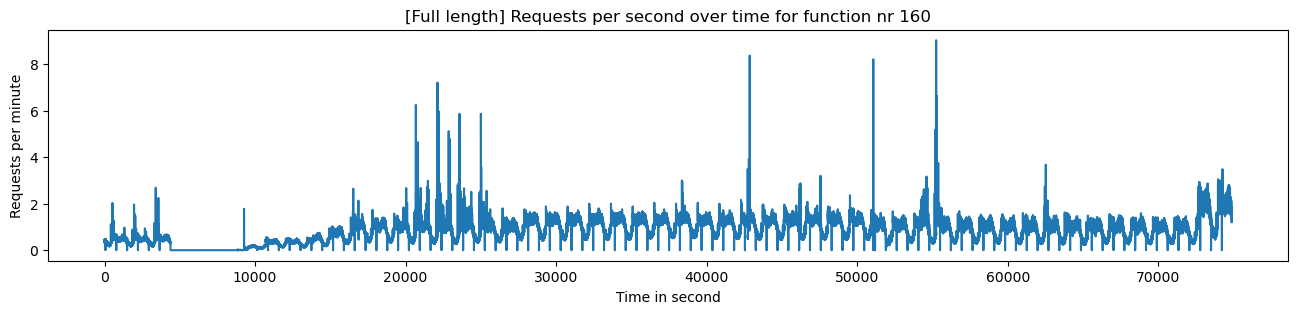

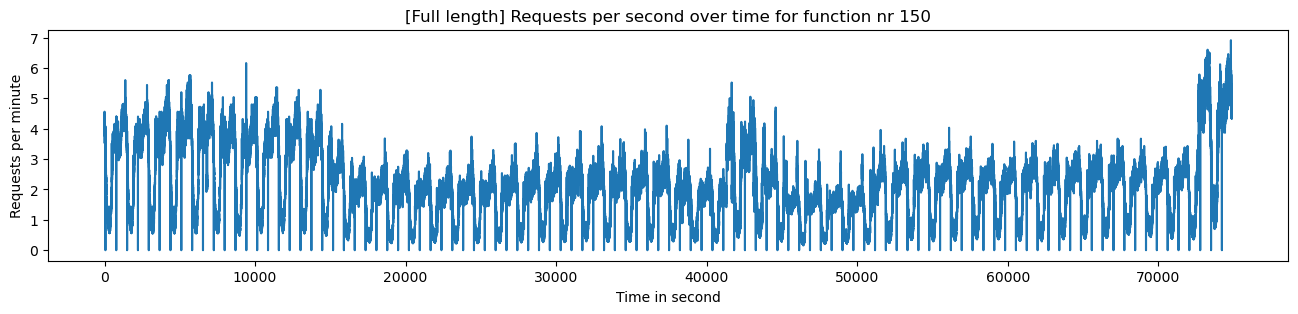

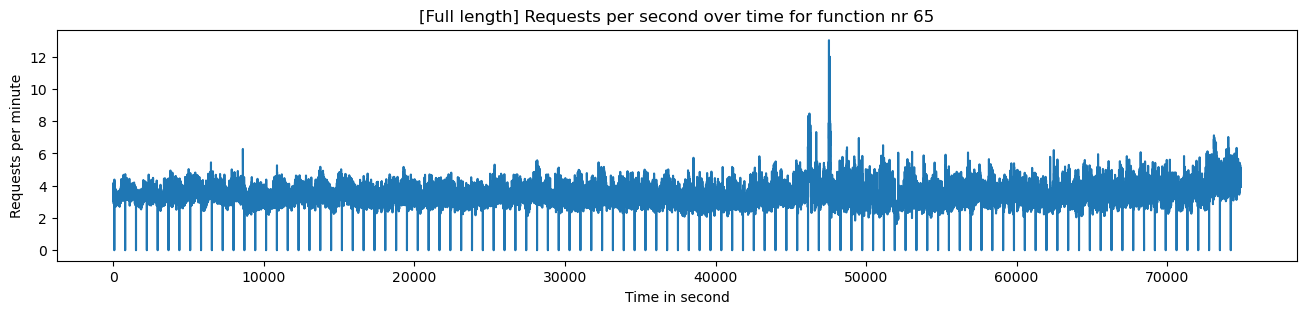

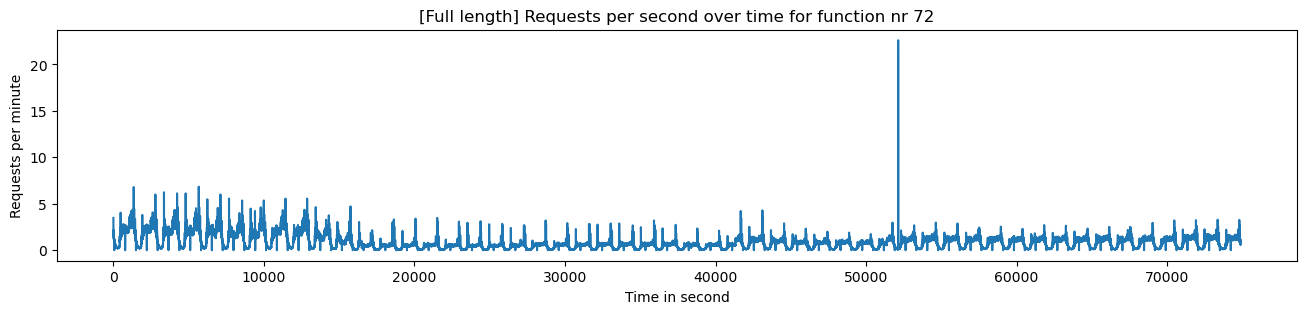

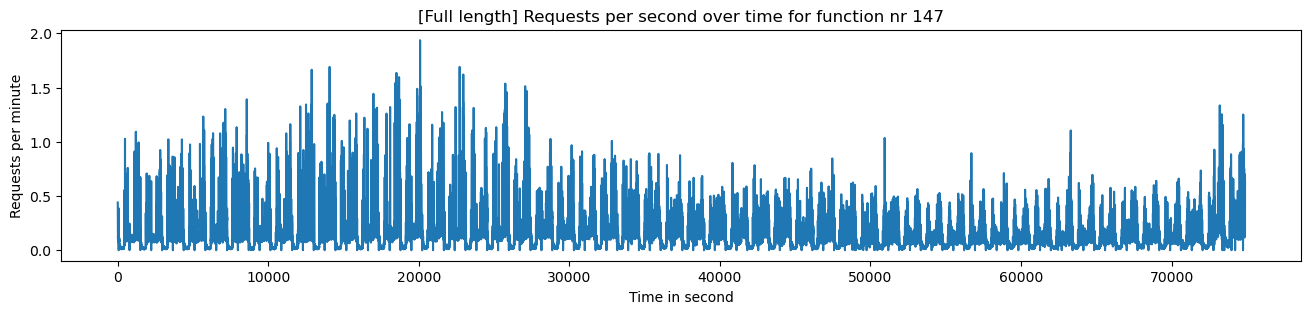

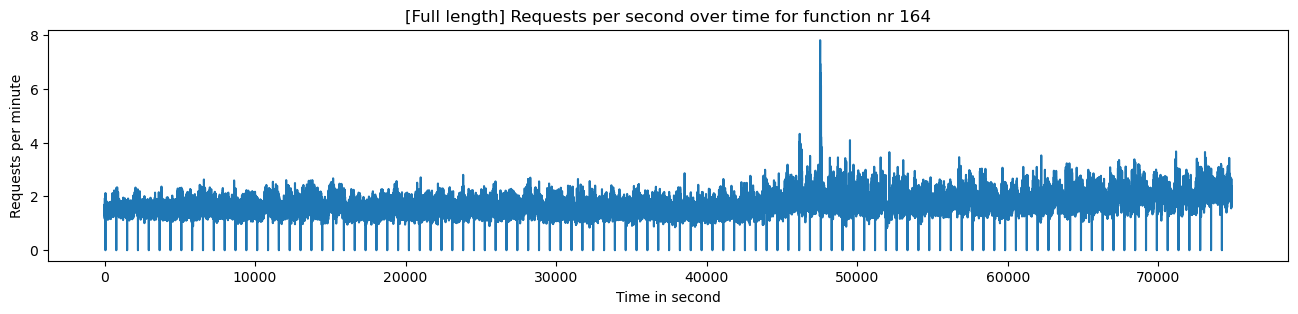

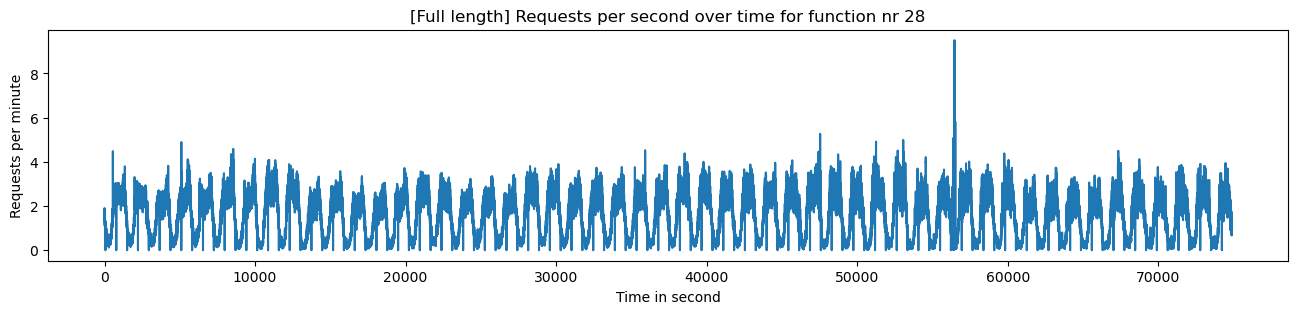

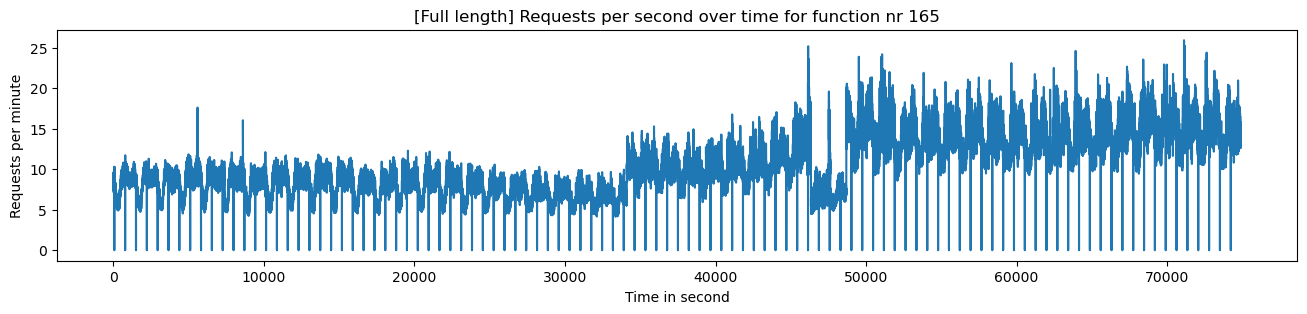

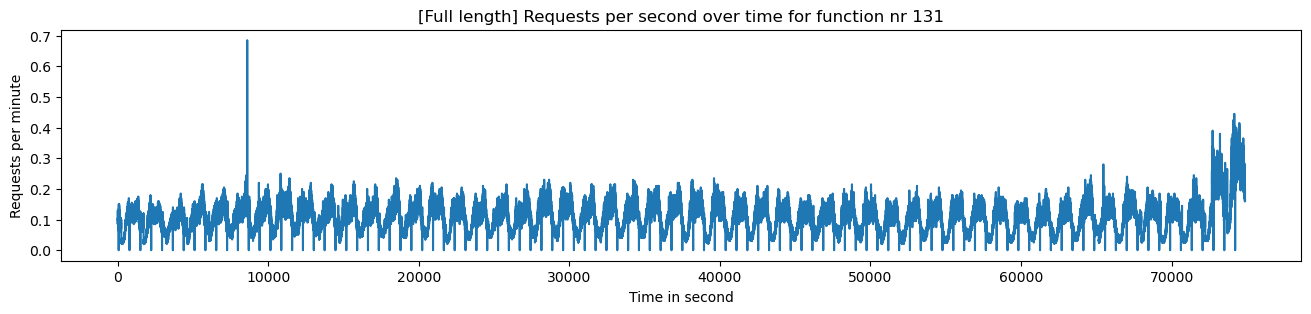

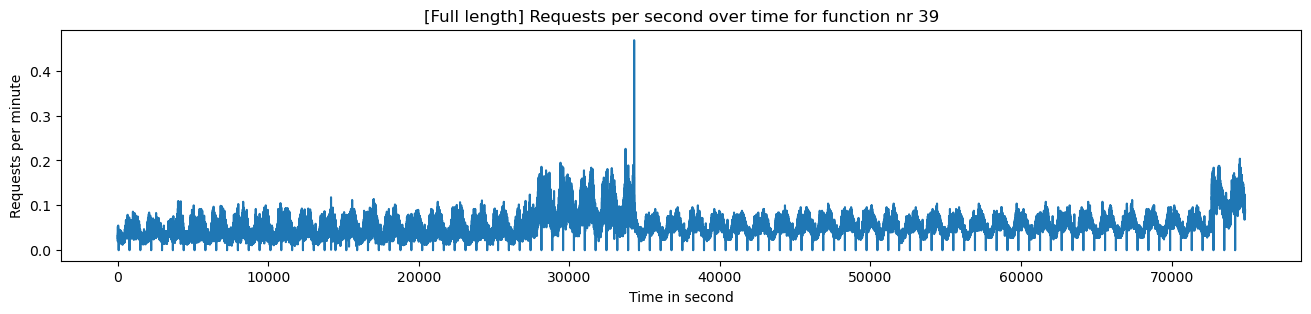

In [63]:
for API_ID in API_IDS:
    fig = plt.figure(figsize=(16, 3))
    cpu_usage = data_df[data_df['API_ID'] == API_ID]['total_cpu_usage'].values
    time_range = data_df[data_df['API_ID'] == API_ID]['time'].values

    start = 0
    end = 10000

    # plt.plot(time_range[start:end], cpu_usage[start:end])
    # plt.scatter(time_range, cpu_usage, s=1)
    plt.plot(cpu_usage)
    plt.xlabel('Time in second')
    plt.ylabel('Requests per minute')
    plt.title('[Full length] Requests per second over time for function nr {}'.format(API_ID))
    plt.show()


In [71]:
# 计算每个API_ID的平均请求数
average_requests_per_api = data_df.groupby('API_ID')['requests_minute'].mean()

# 对平均请求数进行降序排序并选出前10个
top_10_apis = average_requests_per_api.sort_values(ascending=False).head(15)

# 打印结果
print(top_10_apis)

API_ID
33     3.428537e+06
75     9.217244e+05
160    6.393853e+05
150    4.336092e+05
161    4.270297e+05
65     1.214839e+05
66     1.214550e+05
72     1.129219e+05
164    7.602186e+04
147    6.963512e+04
28     5.805647e+04
165    2.653577e+04
86     2.541553e+04
131    2.227871e+04
39     1.924403e+04
Name: requests_minute, dtype: float64


In [72]:
# 从final_df中筛选出API_ID在API_IDS列表中的数据
filtered_df = data_df[data_df['API_ID'].isin(API_IDS)]

filtered_df = filtered_df.sort_values(by=['API_ID', 'time']).reset_index(drop=True)
final_csv_path = os.path.join('../datasets/huawei', 'data.csv')
filtered_df.to_csv(final_csv_path, index=False)

In [73]:
print(filtered_df.describe())

                 day          time           hour         minute       API_ID  \
count  748800.000000  7.488000e+05  748800.000000  748800.000000  748800.0000   
mean       31.211538  2.739847e+06      11.500000      29.500000     112.1000   
std        18.776365  1.622470e+06       6.922191      17.318114      52.0009   
min         0.000000  0.000000e+00       0.000000       0.000000      28.0000   
25%        12.750000  1.123185e+06       5.750000      14.750000      65.0000   
50%        34.500000  3.023970e+06      11.500000      29.500000     139.0000   
75%        47.250000  4.147155e+06      17.250000      44.250000     160.0000   
max        60.000000  5.270340e+06      23.000000      59.000000     165.0000   

       requests_minute  memory_usage_minute  cpu_usage_minute  \
count     7.488000e+05        748800.000000     748800.000000   
mean      1.579172e+05             0.213768          0.152973   
std       2.336402e+05             0.146984          0.133742   
min       

In [74]:
API_IDS = [160, 150, 65]
filtered_df = data_df[data_df['API_ID'].isin(API_IDS)]

filtered_df = filtered_df.sort_values(by=['API_ID', 'time']).reset_index(drop=True)
final_csv_path = os.path.join('../datasets/huawei', 'data2.csv')
filtered_df.to_csv(final_csv_path, index=False)
print(filtered_df.describe())

                 day          time           hour         minute  \
count  224640.000000  2.246400e+05  224640.000000  224640.000000   
mean       31.211538  2.739847e+06      11.500000      29.500000   
std        18.776394  1.622472e+06       6.922202      17.318141   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%        12.750000  1.123185e+06       5.750000      14.750000   
50%        34.500000  3.023970e+06      11.500000      29.500000   
75%        47.250000  4.147155e+06      17.250000      44.250000   
max        60.000000  5.270340e+06      23.000000      59.000000   

              API_ID  requests_minute  memory_usage_minute  cpu_usage_minute  \
count  224640.000000     2.246400e+05        224640.000000     224640.000000   
mean      125.000000     3.981595e+05             0.302599          0.156422   
std        42.622468     3.083094e+05             0.231785          0.112213   
min        65.000000     0.000000e+00             0.000000         